In [1]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from simple_net_lx5 import *

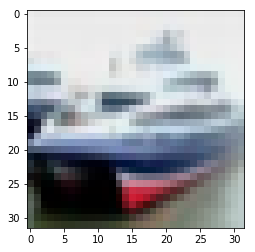

In [2]:
#from torchvision.utils import save_image
import cv2
I = Image.open('ship.png')
I = I.convert("RGB")
I_array = np.array(I)

def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    #npimg = img.numpy()
    plt.imshow(img)
    plt.show()
    #return npimg
imshow(I_array)

In [3]:
def numpy_quantize_tensor_scale_zeropoint(x, num_bits=8, scale=None, zeropoint=None):
    
    qmin = 0.
    qmax = 2.**num_bits - 1.
    #scale, zero_point = calcScaleZeroPoint(min_val, max_val, num_bits)
    q_x = zeropoint + x / scale
    q_x = np.round(np.clip(q_x,qmin,qmax))
    
    #q_x.clamp_(qmin, qmax).round_()
    #q_x = q_x.round().byte()
    return np.array(q_x).astype(np.uint8)

def normalization(img):
    img_nor = img/255.
    mean = [0.5, 0.5, 0.5]
    std = [0.5, 0.5, 0.5]
    mean = np.array(mean).reshape(1,1,3)
    std = np.array(std).reshape(1,1,3)
    return (img_nor-mean)/std


In [4]:
I_array_np = normalization(I_array)
input_conv1 = numpy_quantize_tensor_scale_zeropoint(I_array_np,8,0.11948869665231317,7)

In [5]:
model = simple_net()

Initialize configuration...
Initialize configuration...: done
Initialize Hardware...: load bitstream
Initialize Hardware...: done
memory allocation...
memory allocation...: done
memory allocation...
memory allocation...: done
memory allocation...
memory allocation...: done
memory allocation...
memory allocation...: done
memory allocation...
memory allocation...: done
shape of wgt:  (32, 16, 3, 3)
shape of wgt:  (64, 32, 3, 3)
shape of wgt:  (64, 64, 3, 3)
shape of wgt:  (64, 64, 3, 3)
shape of wgt:  (64, 64, 3, 3)


In [6]:
output = model(input_conv1)

executing layers...
executing conv2dPool
layer 0, IFM size = (32, 32, 3), WGT size = (32, 3, 3, 3), OFM size = (16, 16, 32), time = 2.232200000435114(ms)
executing conv2dPool
layer 1, IFM size = (16, 16, 32), WGT size = (64, 32, 3, 3), OFM size = (8, 8, 64), time = 1.6524898819625378(ms)
executing conv2dPool
layer 2, IFM size = (8, 8, 64), WGT size = (64, 64, 3, 3), OFM size = (4, 4, 64), time = 0.915084034204483(ms)
executing conv2dPool
layer 3, IFM size = (4, 4, 64), WGT size = (64, 64, 3, 3), OFM size = (2, 2, 64), time = 0.8025320712476969(ms)
executing conv2dPool
layer 4, IFM size = (2, 2, 64), WGT size = (64, 64, 3, 3), OFM size = (1, 1, 64), time = 0.7897010073065758(ms)
executing Flatten
layer 5, IFM size = (1, 1, 64), WGT size = (1, 1, 64), OFM size = (1, 1, 64), time = 0.21645193919539452(ms)
executing Fully Connected Layer


IndexError: too many indices for array